# Artificial Intelligence Project 2 - Applied ML

#### Contributor: Dumitrascu Filip-Teodor 333CA

## Imports

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Air pollution data set 

### I. EDA (Exploratory Data Analysis)

In [44]:
# Load data
airData = pd.read_csv('data/air_pollution_full.csv')

if 'Unnamed: 0' in airData.columns:
    airData = airData.drop(columns=['Unnamed: 0'])

airData.head(n=5)

,Country,City,AQI_Value,AQI_Category,CO_Value,CO_Category,Ozone_Value,Ozone_Category,NO2_Value,NO2_Category,PM25_Value,PM25_Category,VOCs,SO2,Emissions
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36.0,Good,0.0,Good,51,L1,137.467141,10.583998,L1
1,Brazil,Presidente Dutra,41,Good,1,Good,5.0,Good,1.0,Good,41,L0,106.117357,3.415177,L0
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39.0,Good,2.0,Good,66,L1,176.476885,-0.907915,L1
3,Poland,Przasnysz,34,Good,1,Good,34.0,Good,0.0,Good,20,L0,105.230299,3.394132,L0
4,France,Punaauia,22,Good,0,Good,22.0,Good,0.0,Good,6,L0,57.658466,12.458327,L0


#### 1. Analyse the type of attributes and their range of values

##### Attribute types

In [ ]:
# Separation by data type
numeric_cols = airData.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = airData.select_dtypes(include=['object']).columns.tolist()

continuous_features = numeric_cols.copy()
discrete_features = []
ordinal_features = []

for col in categorical_cols:
    if col == 'AQI_Category':
        ordinal_features.append(col)
    else:
        discrete_features.append(col)

print("Continuous features:", continuous_features)
print("Discrete features:", discrete_features)
print("Ordinal features:", ordinal_features)

Continuous features: ['AQI_Value', 'CO_Value', 'Ozone_Value', 'NO2_Value', 'PM25_Value', 'VOCs', 'SO2']
Discrete features: ['Country', 'City', 'CO_Category', 'Ozone_Category', 'NO2_Category', 'PM25_Category', 'Emissions']
Ordinal features: ['AQI_Category']


##### Continuous attribute analysis and boxplot

,count,mean,std,min,25%,50%,75%,max
AQI_Value,23463.0,72.010868,56.055220,6.000000,39.000000,55.000000,79.000000,500.000000
CO_Value,23463.0,1.368367,1.832064,0.000000,1.000000,1.000000,1.000000,133.000000
Ozone_Value,21117.0,35.239665,28.149280,0.000000,21.000000,31.000000,40.000000,222.000000
NO2_Value,23463.0,43.084153,196.079179,0.000000,0.000000,1.000000,4.000000,1003.063334
PM25_Value,23463.0,68.519755,54.796443,0.000000,35.000000,54.000000,79.000000,500.000000
VOCs,23463.0,185.053110,140.486759,12.415670,103.267345,142.972272,204.227896,1280.988229
SO2,23463.0,4.447841,5.953601,-18.528019,0.735052,4.286825,7.916001,234.692971


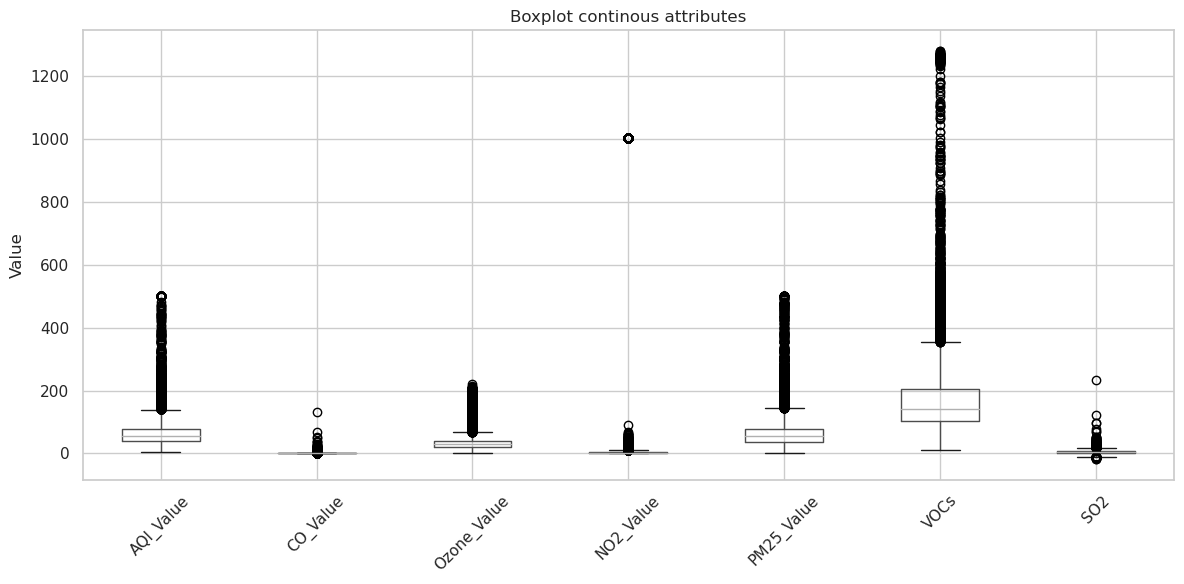

In [36]:
# Description
display(airData[continuous_features].describe().T)

# Boxplot config
plt.figure(figsize=(12, 6))
airData[continuous_features].boxplot(rot=45)

plt.title("Boxplot continous attributes")
plt.ylabel("Value")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### Ordinal attribute anlaysis and histogram

- Number of examples non-null: 23463
- Number of unique values: 6


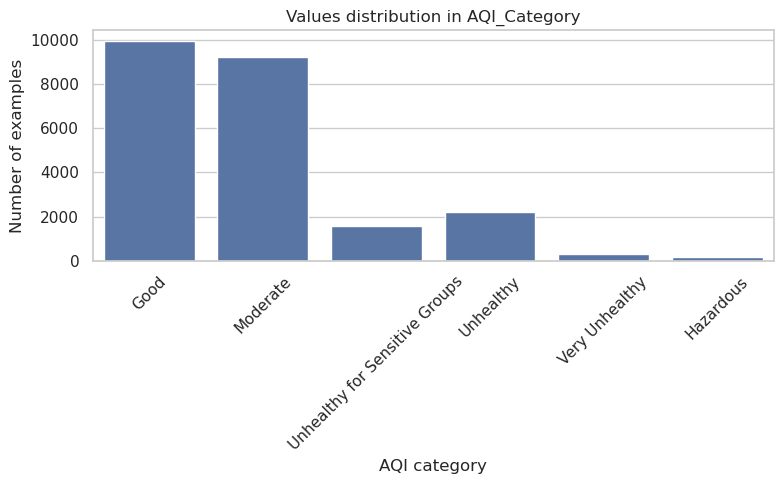

In [49]:
# The ordered values of the AQI category
ordered_aqi_levels = [
    "Good", "Moderate", "Unhealthy for Sensitive Groups",
    "Unhealthy", "Very Unhealthy", "Hazardous"
]

non_null_count = airData[ordinal_features[0]].notna().sum()
unique_count = airData[ordinal_features[0]].nunique()
print(f"- Number of examples non-null: {non_null_count}")
print(f"- Number of unique values: {unique_count}")


# histogram
plt.figure(figsize=(8, 5))
sns.countplot(data=airData, x=ordinal_features[0], order=ordered_aqi_levels)

plt.title("Values distribution in AQI_Category")
plt.xlabel("AQI category")

plt.ylabel("Number of examples")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 2. Class balance analysis